# Springboard Data Science Career Track Unit 4 Challenge - Tier Two Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. Let's see how this new knowledge can help solve a real world problem. 

In this notebook, we're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

This is the Tier Two notebook. Don't sweat it if you got stuck on the highest difficulty. You'll have a lot more guidance this time around. If you get stuck again, you can always drop down to Tier One. Just remember to come back around and redo the project on the higher difficulty.

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline
Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 

### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd 
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data


Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing 
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

#### 2.1. Exploring the data

In [4]:
# First off, let's use .shape feature of pandas DataFrames to look at the number of rows and columns. 
properties.shape

(346, 49)

In [5]:
# Using the .head() method, let's check out the state of our dataset.  
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


Oh no! What are you supposed to do with this?

You've got the data, but it doesn't look tidy. At this stage, you'd struggle to perform analysis on it. It is normal for your initial data set to be formatted in a way that is not conducive to analysis. A big part of our job is fixing that.

Best practice is for pandas DataFrames to contain the observations of interest as rows, and the features of those observations as columns. You want tidy DataFrames: whose rows are observations and whose columns are variables.

Notice here that the column headings are the particular boroughs, which is our observation of interest. The first column contains datetime objects that capture a particular month and year, which is a variable. Most of the other cell-values are the average proprety values of the borough corresponding to that time stamp.

Clearly, we need to roll our sleeves up and do some cleaning.

####  2.2. Cleaning the data (Part 1)
Data cleaning has a bad rep, but remember what your momma told you: cleanliness is next to godliness. Data cleaning can be really satisfying and fun. In the dark ages of programming, data cleaning was a tedious and difficult ordeal. Nowadays, new and improved tools have simplified the process. Getting good at data cleaning opens up a world of possibilities for data scientists and programmers. 
 
The first operation you want to do on the dataset is called **transposition**. you *transpose* a table when you flip the columns into rows, and *vice versa*. 

If you transpose this DataFrame then the borough names will become the row indices, and the date time objects will become the column headers. Since your end goal is tidy data, where each row will represent a borough and each column will contain data about that borough at a certain point in time, transposing the table bring you closer to where you want to be.

Python makes transposition simple.

Each pandas DataFrame already has the *.T* attribute which is the transposed version of that DataFrame.

Assign the transposed version of the original to a new variable and call it *properties_T*. 

Boom! You’ve got a transposed table to play with.

In [6]:
# Do this here
properties_T = properties.transpose() 

In [8]:
# Let's check the head of our new Transposed DataFrame. 
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292


You've made some progress! But with new progress comes new issues. For one, the row indices of your DataFrame contain the names of the boroughs. You should never have a piece of information you want to analyze as an index, this information should be within the DataFrame itself. The indices should just be a unique ID, almost always a number.

Those names are perhaps the most important piece of information! Put them where you can work with them.

In [9]:
# To confirm what our row indices are, let's call the .index variable on our properties_T DataFrame. 
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [10]:
# Our suspicion was correct. 
# Call the .reset_index() method on properties_T to reset the indices, and the reassign the result to properties_T: 
properties_T = properties_T.reset_index() 

In [11]:
# Now let's check out our DataFrames indices: 
properties_T.head() 

,index,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292



Progress! 

The indicies are now a numerical RangeIndex, exactly what you want. 

**Note**: if you call the reset_index() line more than once, you'll get an error because a whole extra level of row indices will have been inserted! If you do this, don't worry. Just hit Kernel > Restart, then run all the cells up to here to get back to where you were. 


In [12]:
# Call the head() function again on properties_T to check out the new row indices: 
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292


You're getting somewhere, but our column headings are mainly just integers. The first one is the string 'index' and the rest are integers ranging from 0 to 296, inclusive.


For the ultimate aim of having a *tidy* DataFrame, turn the datetimes found along the first row (at index 0) into the column headings.  The resulting DataFrame will have boroughs as rows, the columns as dates (each representing a particular month), and the cell-values as the average property value sold in that borough for that month. 

In [13]:
# To confirm that our DataFrame's columns are mainly just integers, call the .columns feature on our DataFrame:
properties_T.columns 

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           336,     337,     338,     339,     340,     341,     342,     343,
           344,     345],
      dtype='object', length=347)

To confirm that the first row contains the proper values for column headings, use the  ***iloc[] method*** on our *properties_T* DataFrame. Use index 0. You'll recall from DataCamp that if you use single square brackets, you'll return a series. If you use double square brackets, a DataFrame is returned.

In [14]:
# Call the iloc[] method with double square brackets on the properties_T DataFrame, to see the row at index 0. 
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00


**Notice that these values are all the months from January 1995 to August 2019, inclusive**. You can reassign the columns of your DataFrame the values in the row at index 0 by making use of the *.columns* feature.

In [15]:
# Try this now. 
properties_T.columns = properties_T.iloc[0]

In [16]:
# Check out our DataFrame again: 
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292


Drop the row at index 0! 

A good way to do this is reassign *properties_T* the value given by the result of calling ***drop()*** on it, with 0 passed to that method.

In [17]:
# Have a go at this now. 
properties_T = properties_T.drop(0)

In [18]:
# Now check out our DataFrame again to see how it looks. 
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,552767,551093,534129,525561,523992,524452,531478,531425,557552,565929


You're slowly but surely getting there! Exciting, right? 

**Each column now represents a month and year, and each cell-value represents the average price of houses sold in borough of the corresponding row**. 

You have total control over your data! 

#### 2.3. Cleaning the data (Part 2)
You can see from the *.head()* list call that you need to rename some of your columns. 

'Unnamed: 0' should be something like 'London Borough' and 'NaN' should  be changed. 

Recall, that pandas DataFrames have a ***.rename()*** method. One of the keyworded arguments to this method is *columns*. You can assign it a dictionary whose keys are the current column names you want to change, and whose values are the desired new names.

**Note**: you can change the 'Unnamed: 0' name of the first column just by including that string as a key in our dictionary, but 'NaN' stands for Not A Number,  and is denoted by *pd.NaT*. Do not use quotes when you include this value. NaN means Not A Number, and NaT means Not A Time - both of these values represent undefined or unrepresenable values like 0/0. They are functionally Null values. Don't worry, we'll help you with this.

 Call the **rename()** method on *properties_T* and set the *columns* keyword equal to the following dictionary: 
{'Unnamed: 0':'London_Borough', pd.NaT: 'ID'} 
, then reassign that value to properties_T to update the DataFrame.

In [19]:
# Try this here. 
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [20]:
# Let's check out the DataFrame again to admire our good work. 
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,975240,963094,869039,930986,903718,958418,951649,931176,861107,807475
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,355596,353429,346193,345288,348254,349590,346099,343430,344171,345614
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,592328,596085,602336,596064,587132,575141,575829,583479,597591,584740
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,409059,402365,403398,399796,398544,391077,390880,396718,396278,396292
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,552767,551093,534129,525561,523992,524452,531478,531425,557552,565929


You're making great leaps forward, but your DataFrame still has lots of columns. Let's find out exactly how many it has by calling ***.columns*** on our DataFrame.


In [21]:
# Try this here. 
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00,
       2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00,
       2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00,
       2023-09-01 00:00:00],
      dtype='object', name=0, length=347)

#### 2.4. Transforming the data
Our data would be tidier if we had fewer columns. 

In fact a ***single*** column for time be better than nearly 300? This single column will contain all of the datetimes in our current column headings. 

**Remember** the two most important properties of tidy data are:
1. **Each column is a variable.**

2. **Each row is an observation.**

One of the miraculous things about pandas is ***melt()***, which enables us to melt those values along the column headings of our current DataFrame into a single column.  

Let's make a new DataFrame called clean_properties, and assign it the return value of ***pd.melt()*** with the parameters: *properties_T* and *id_vars = ['Borough', 'ID']*. 

The result will be a DataFrame with rows representing the average house price within a given month and a given borough. Exactly what we want. 

In [22]:
# Try this here: 
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])

In [23]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Awesome. This is looking good. 

We now want to rename the '0' column 'Month', and the 'value' column 'Average_price'. 

Use the ***rename()*** method, and reassign *clean_properties* with the result. 

In [24]:
# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [25]:
# Check out the DataFrame: 
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


You need to check out the data types of our clean_properties DataFrame, just in case you need to do any type conversions. 

In [26]:
# Let's use the .dtypes attribute to check the data types of our clean_properties DataFrame:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

You should change the Average_price column to a numeric type, specifically, a float.

Call the ***to_numeric()*** method on *pd*, pass the 'Average_price' column into its brackets, and reassign the result to the *clean_properties* 'Average_price' column.

In [27]:
# Try this here
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [28]:
# Check out the new data types:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [30]:
# To see if there are any missing values, we should call the count() method on our DataFrame:
clean_properties.count()

London_Borough    16560
ID                15525
Month             16560
Average_price     15525
dtype: int64

#### 2.5. Cleaning the data (Part 3) 
Houston, we have a problem!

There are fewer data points in some of the columns. Why might this be? Let's investigate.

Since there are only 32 London boroughs, check out the unique values of the 'London_Borough' column to see if they're all there.

Just call the ***unique()*** method on the London_Borough column. 

In [31]:
# Do this here. 
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

Aha! Some of these strings are not London boroughs. You're basically Sherlock Holmes, getting ever closer solving the mystery! 

The strings that don't belong:
- 'Unnamed: 34'
- 'Unnamed: 37'
- 'NORTH EAST'
- 'NORTH WEST'
- 'YORKS & THE HUMBER' 
- 'EAST MIDLANDS'
- 'WEST MIDLANDS'
- 'EAST OF ENGLAND'
- 'LONDON' 
- 'SOUTH EAST' 
- 'SOUTH WEST'
- 'Unnamed: 47' 
- 'England'

Go see what information is contained in rows where London_Boroughs is 'Unnamed’ and, if there’s nothing valuable, we can drop them.  To investigate, subset the clean_properties DataFrame on this condition.

In [32]:
# Subset clean_properties on the condition: df['London_Borough'] == 'Unnamed: 34' to see what information these rows contain. 
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [33]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


These rows don't contain any valuable information. Delete them.



In [34]:
# Let's look at how many rows have NAs as their value for ID. 
# To this end, subset clean_properties on the condition: clean_properties['ID'].isna().
# Notice that this line doesn't actually reassign a new value to clean_properties. 
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
16500,Unnamed: 37,NaN,2023-08-01,NaN
16510,Unnamed: 47,NaN,2023-08-01,NaN
16545,Unnamed: 34,NaN,2023-09-01,NaN
16548,Unnamed: 37,NaN,2023-09-01,NaN


You always have a ***choice*** about how to deal with Null (NaN) values. We'll teach you two methods today:
1. filtering on ***notna()***
2. reassigning on ***dropna()***

Try ***notna()*** first.  ***notna()*** will return a series of booleans, where the value will be true if there's a not a null and false if there is a null.

Make a new variable called *NaNFreeDF1* and assign it the result of filtering *clean_properties* on the condition: *clean_properties['Average_price'].notna()*

In [35]:
# Try your hand at method (1) here: 
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [36]:
# If we do a count on our new DataFrame, we'll see how many rows we have that have complete information: 
NaNFreeDF1.count()

London_Borough    15525
ID                15525
Month             15525
Average_price     15525
dtype: int64

Looks good! 

For completeness, now use ***dropna()***. ***dropna()*** will drop all null values. 

Make a new variable called *NaNFreeDF2*, and assign it the result of calling ***dropna()*** on *clean_properties*. 

In [37]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [38]:
# Let's do a count on this DataFrame object: 
NaNFreeDF2.count()

London_Borough    15525
ID                15525
Month             15525
Average_price     15525
dtype: int64

In [41]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

Both these methods did the job! Thus, you can pick either resultant DataFrame.

In [43]:
# Using the .shape attribute, compare the dimenions of clean_properties, NaNFreeDF1, and NaNFreeDF2: 
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(16560, 4)
(15525, 4)
(15525, 4)


Our suggestions is to pick NaNFreeDF2. 

Go drop the rest of the invalid 'London Borough' values.

An elegant way to do this is to make a list of all those invalid values, then use the *isin()* method, combined with the negation operator *~*, to remove those values. Call this list *nonBoroughs*.

In [44]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

Filter *NanFreeDF2* first on the condition that the rows' values for *London_Borough* is *in* the *nonBoroughs* list. 

In [45]:
# Do this here. 
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
16554,EAST OF ENGLAND,E12000006,2023-09-01,352509.00000
16555,LONDON,E12000007,2023-09-01,537424.00000
16556,SOUTH EAST,E12000008,2023-09-01,392174.00000
16557,SOUTH WEST,E12000009,2023-09-01,328668.00000


Now put the negation operator *~* before the filter statement to get just those rows whose values for *London_Borough* is **not** in the *nonBoroughs* list:

In [46]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16540,Sutton,E09000029,2023-09-01,437958.00000
16541,Tower Hamlets,E09000030,2023-09-01,509454.00000
16542,Waltham Forest,E09000031,2023-09-01,510471.00000
16543,Wandsworth,E09000032,2023-09-01,637929.00000


Then just execute the reassignment: 

In [47]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [50]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Make a new variable called simply *df*, which is what data scientists typically call their final-stage DataFrame that's ready for analysis. 

In [52]:
# Do that here. 
df = NaNFreeDF2

In [53]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [54]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

#### 2.6. Visualizing the data
It'll help to get a visual idea of the price shift occurring in the London boroughs.

Restrict your observations to Camden for now.

How have housing prices changed since 1995? 

Text(0, 0.5, 'Price')

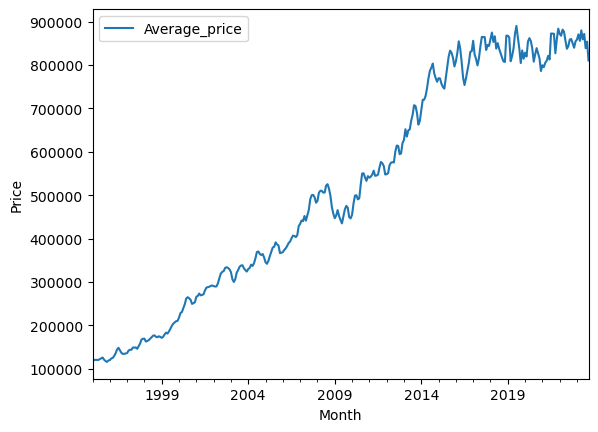

In [57]:
# First of all, make a variable called camden_prices, and assign it the result of filtering df on the following condition:
# df['London_Borough'] == 'Camden'
camden_prices = df[df['London_Borough'] == 'Camden']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax = camden_prices.plot(kind ='line', x = 'Month', y = 'Average_price')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')

To limit the amount of temporal data-points, it's useful to extract the year from every value in your *Month* column. 300 is more datapoints than we need.

To this end, apply a ***lambda function***. The logic  works as follows. You'll:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column

In [58]:
# Try this yourself. 
df['Year'] = df['Month'].apply(lambda t: t.year)

# Call the tail() method on df
df.tail()

,London_Borough,ID,Month,Average_price,Year
16540,Sutton,E09000029,2023-09-01,437958.0,2023
16541,Tower Hamlets,E09000030,2023-09-01,509454.0,2023
16542,Waltham Forest,E09000031,2023-09-01,510471.0,2023
16543,Wandsworth,E09000032,2023-09-01,637929.0,2023
16544,Westminster,E09000033,2023-09-01,967277.0,2023


To calculate the mean house price for each year, you first need to **group by** the London_Borough and Year columns.

Make a new variable called *dfg*, and assign it the result of calling the ***groupby()*** method on *df*. Plug in the parameters: by=['Borough', 'Year']. Chain ***mean()*** onto your function to get the average of values. 

We've helped you with this line, it's a little tricky. 

In [61]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now indices
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

C:\Users\rgarl\AppData\Local\Temp\ipykernel_30188\1397047810.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(by=['London_Borough', 'Year']).mean()


Average_price
London_Borough       Year               
Enfield              2008  245839.333108
                     2000  121839.206633
Sutton               2002  162526.655508
Harrow               1998  114778.250067
Enfield              1998   93030.224322
Greenwich            2017  391749.944825
City of London       1998  148031.894542
Wandsworth           2018  596649.139044
Kingston upon Thames 1999  129697.035550
                     1997   99856.850760

In [62]:
# Let's reset the index for our new DataFrame dfg, and call the head() method on it. 
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


### 3. Modeling
Now comes the really exciting stuff. 

You'll create a function that will calculate a ratio of house prices, that compares the price of a house in 2018 to the price in 1998. 

Call this function create_price_ratio. 

You want this function to:

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: **dfg[dfg['London_Borough']=='Camden']**. 

2. Get the Average Price for that borough for 1998 and, seperately, for 2018. 

3. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018. 

4. Return that ratio. 

Once you've written this function, you'll use it to iterate through all the unique London Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox (Part 1), all modules


In [67]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio


In [68]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[0.20422256235393685]

In [69]:
# We want to do this for all of the London Boroughs. 
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [70]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.229452741207858], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837315], 'Camden': [0.20261973503252542], 'City of London': [0.18862157770244364], 'Croydon': [0.23803288028014052], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011858], 'Greenwich': [0.20995010893854213], 'Hackney': [0.16133493530705728], 'Hammersmith & Fulham': [0.24167443054605847], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.2312015578701476], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300288], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.2341619023428255], 'Lambeth': [0.20170435486140825], 'Lewisham': [0.18351246764721704], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark': [

Now you have a dictionary with data about the ratio of average prices for each borough between 1998 and 2018,  but you can make it prettier by converting it to a DataFrame. 

In [71]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

In [72]:
# Call the head() method on this variable to check it out. 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,0.234551,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [73]:
# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [75]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [76]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)


                 Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655


[Text(0, 0, 'Hounslow'),
 Text(1, 0, 'Richmond upon Thames'),
 Text(2, 0, 'Harrow'),
 Text(3, 0, 'Bromley'),
 Text(4, 0, 'Sutton'),
 Text(5, 0, 'Hammersmith & Fulham'),
 Text(6, 0, 'Hillingdon'),
 Text(7, 0, 'Croydon'),
 Text(8, 0, 'Bexley'),
 Text(9, 0, 'Enfield'),
 Text(10, 0, 'Kingston upon Thames'),
 Text(11, 0, 'Ealing'),
 Text(12, 0, 'Havering'),
 Text(13, 0, 'Barnet'),
 Text(14, 0, 'Redbridge')]

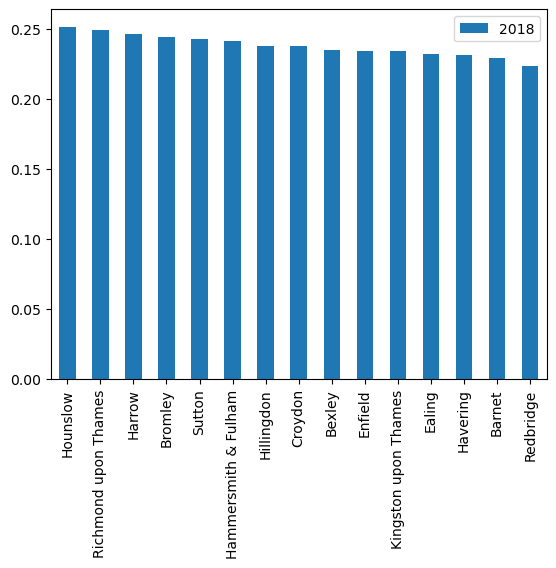

In [77]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
Congratulation!  You're done. Excellent work.

What can you conclude? Type your conclusions below. 

We hope you enjoyed this practical project. It should have consolidated your data cleaning and pandas skills by looking at a real-world problem with the kind of dataset you might encounter as a budding data scientist. 